##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
!pip install gitpython

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [62]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



We are going to use the data of voter registration in the United States to to see if we can find any trends whether it is on a national scale or for each state. With this information we would be able to answer the following questions:

1. While looking at the data that have been collected for voter registration which month of the state have the highest voter registration?

2. But also out of each states which state have the highest voter registration while being compared to each other?

In [63]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

The first five row of the dataframe is shown below. Each of the variable name represent a differnet information that we need. The jurisdiction is the name of the 12 states that the voter registration is collect from. The year and the month is telling us if it is from 2016 or 2020 and what months from January thorugh May did they register. Lastly the New registered voter is the amoung of people that register to vote.

In [64]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

There are no missing data within our dataframe

In [65]:
voters.isnull().values.any()

False

Check your data types. (1 point)

We have two data type one being a string data (object) and integer(int64) which is just whole number values.

In [66]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [67]:
voters=voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

One of the potential limitation is that we do not have the data from every state which mean we would have not necessary have the correct information to come up with the result in the natioanl trends. Within the datafreame we were only given who year which is 2016 and 2020 with only the first four top five month on the year.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



The highest amount of new voter registeration was from California in Feburary of 2020 with 238281 voters who registered.

In [68]:
voters.loc[voters['registered_voters']==voters['registered_voters'].max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

The average voter registration was roughly 48223

In [9]:
mean_voters = voters["registered_voters"].mean()
mean_voters

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


There were 36 times where the voter_registration amount is above the aveage.

In [10]:
voters["high_voters"]=voters["registered_voters"] >= mean_voters
voters

,NAME,Year,Month,registered_voters,high_voters
0,Arizona,2016,Jan,25852,False
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
3,Arizona,2016,Apr,30668,False
4,Arizona,2020,Jan,33229,False
...,...,...,...,...,...
101,Virginia,2020,Jan,25934,False
102,Virginia,2020,Feb,29507,False
103,Virginia,2020,Mar,31492,False
104,Virginia,2020,Apr,5467,False


In [11]:
voters.high_voters.value_counts()

,count
high_voters,
False,70
True,36


How many times did each state go above the national average for new voter registration? (2 points)



In [12]:
avg_state= voters.groupby("NAME")["high_voters"].sum()
avg_state

,high_voters
NAME,
Arizona,3
California,7
Colorado,0
Delaware,0
District of Columbia,0
Florida,7
Georgia,1
Illinois,4
Maryland,0


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

Texas, California and Florida have the highest voter registration with Texas at 8 and California and Florida at 7.

In [13]:
avg_state.sort_values(ascending=False).head(3)

,high_voters
NAME,
Texas,8
California,7
Florida,7


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

We are able to see that California and Texas is one of the few states that we see have an increase in the the total registration. While there are other staets such as Delware and District of Columbia where there have been a more stable amount of voter registration that have been reported as the they are stacked and the color are more darken. While other states also have and increase in the number of people who registered to vote but they do not go up as high as Califona where it was almost around 240000. While most of the other states all roughly stay below 120000.

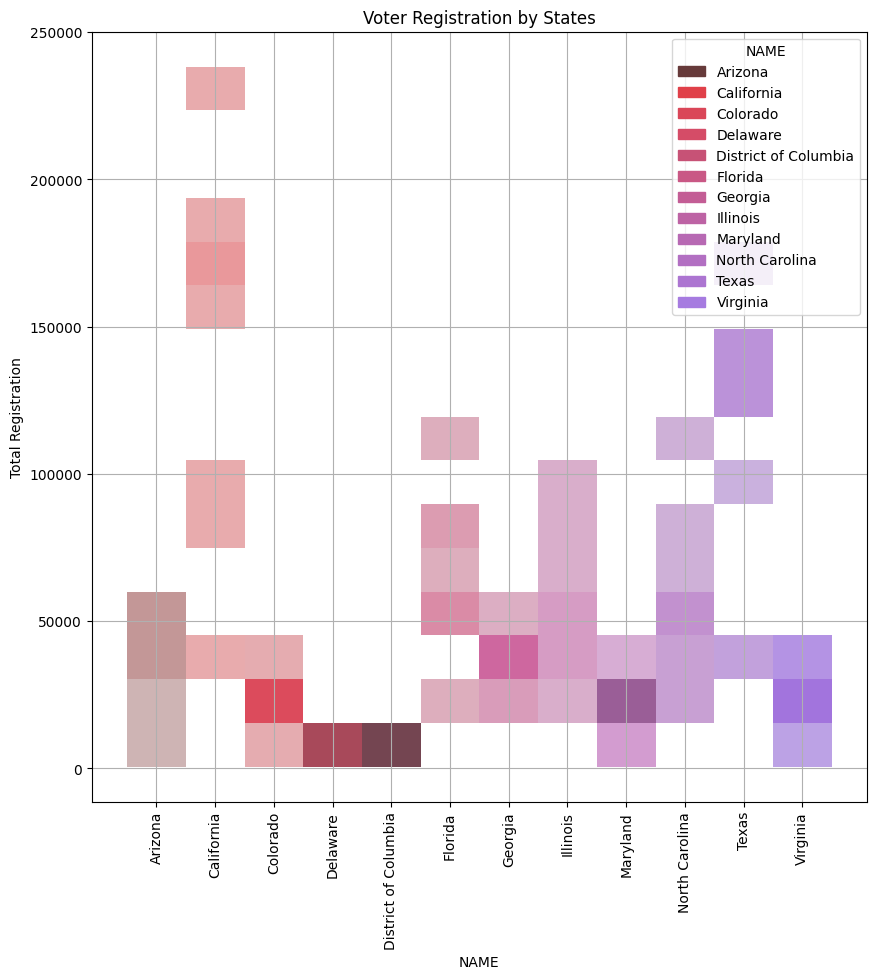

In [14]:
plt.figure(figsize=(10,10))
color=['#663a3a','#e04049','#da4658','#d54c67','#c75276','#c95885','#c35d95','#bd63a4','#b769b3','#b26fc2','#ac75d1','#a67be0']
sns.histplot(voters, x='NAME', y='registered_voters', hue='NAME', palette=color)
plt.xlabel('NAME')
plt.ylabel('Total Registration')
plt.title('Voter Registration by States')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

In this graph we are able to see the total voter registation  of each state by the month. Each of the month is being represented by a seperate color. We can see the majority of the time Feburary is the one with the highest voter registation with the expect of march being higher than Feburary for a few states.

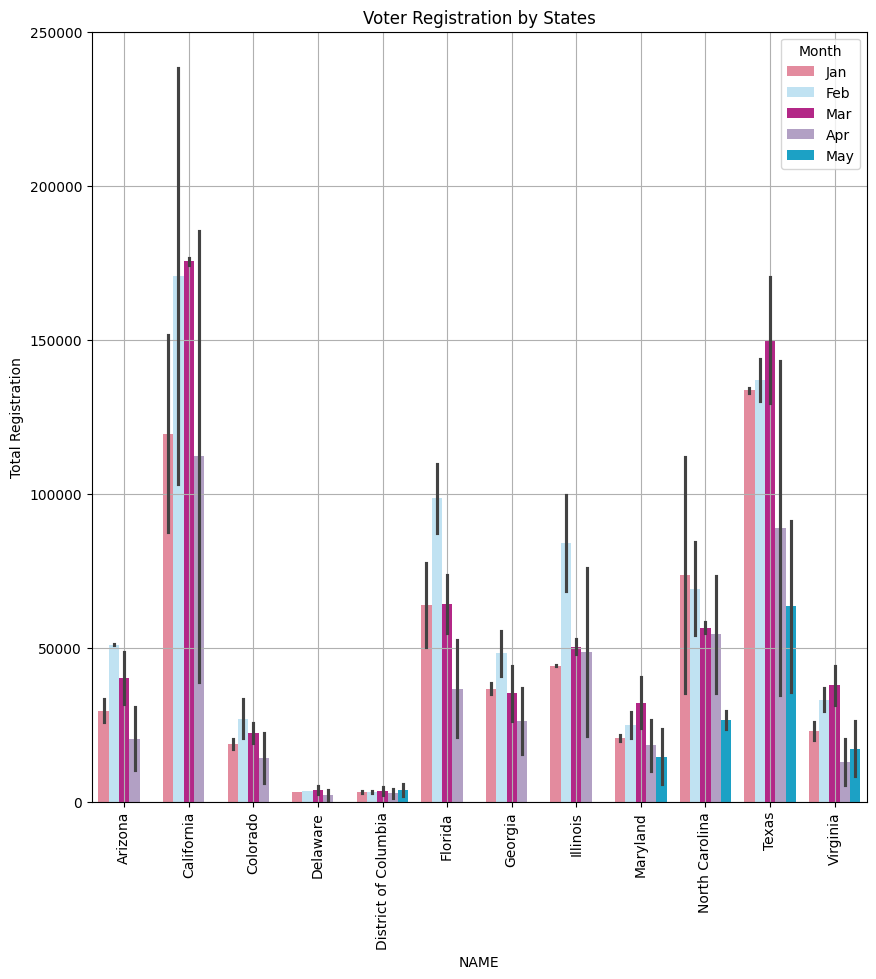

In [15]:
plt.figure(figsize=(10,10))
color=['#f27c96','#b8e5fa','#ca1090','#b29aca','#00b1e1']
sns.barplot(voters, x='NAME',y='registered_voters', hue='Month', palette=color)
plt.xlabel('NAME')
plt.ylabel('Total Registration')
plt.title('Voter Registration by States')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

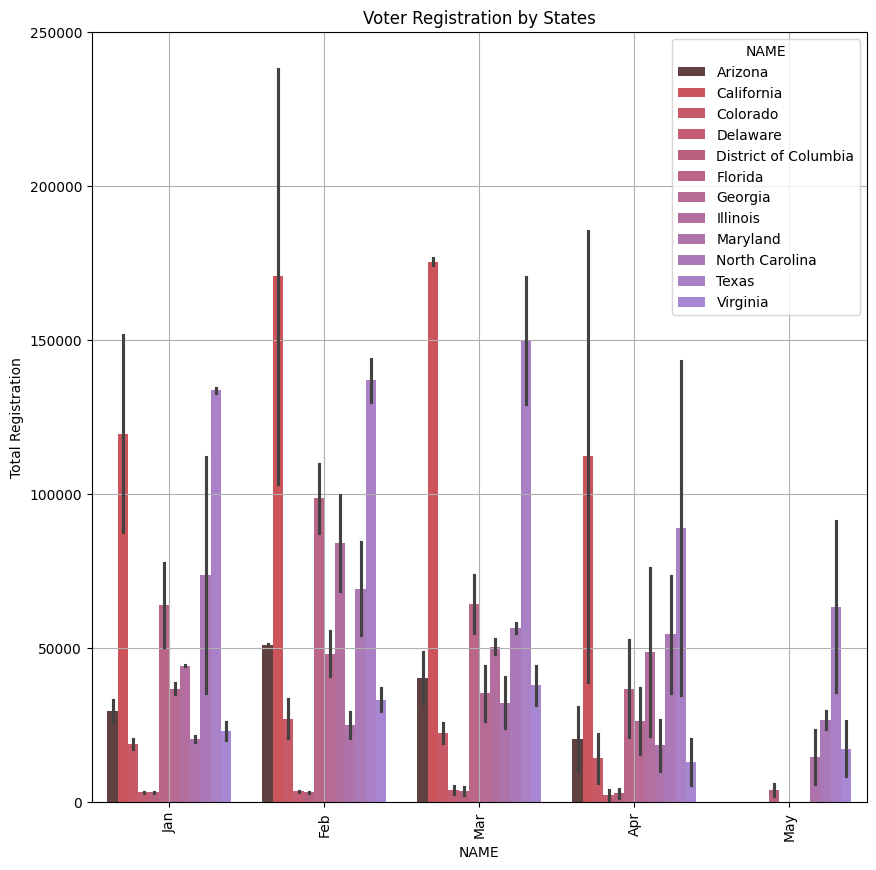

In [16]:
plt.figure(figsize=(10,10))
color=['#663a3a','#e04049','#da4658','#d54c67','#c75276','#c95885','#c35d95','#bd63a4','#b769b3','#b26fc2','#ac75d1','#a67be0']
sns.barplot(voters, x='Month',y='registered_voters', hue='NAME', palette=color)
plt.xlabel('NAME')
plt.ylabel('Total Registration')
plt.title('Voter Registration by States')
plt.xticks(rotation=90)
plt.grid()
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [17]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [18]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

<Axes: >

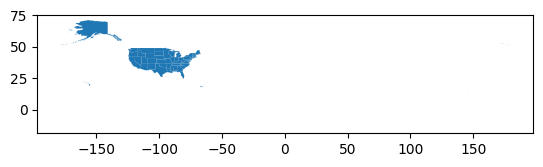

In [19]:
states.plot()

Set our continental US bounding box to us for the next questions. (2 points)

In [20]:
minx, miny, maxx, maxy =-125, 24.396308, -66.93457, 49.384358

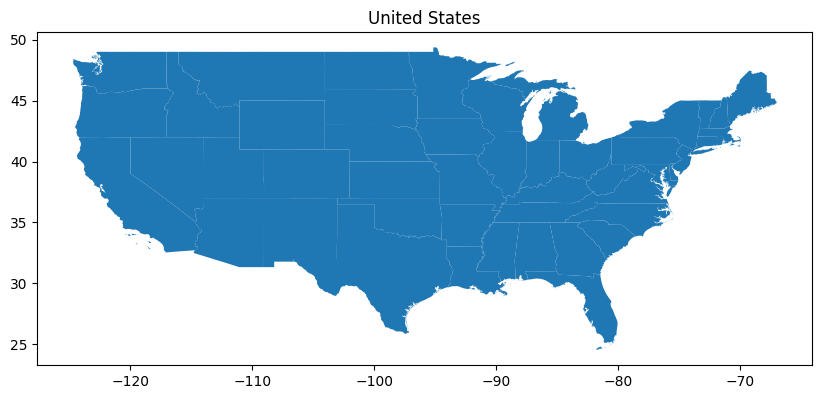

In [21]:
states_us = states.cx[minx:maxx, miny:maxy]
states_us.plot(figsize=(10, 10))
plt.title("United States")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [39]:
state_avg= voters.groupby("NAME")["registered_voters"].mean()
state_avg

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [33]:
states=states.rename(columns={"states":"NAME"})
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [42]:
states_us= states_us.merge(state_avg, on='NAME', how='inner')
states_us

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Year,Month,registered_voters_x,high_voters,Average_Voters,state_avg,registered_voters_y,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Jan,35213,False,NaN,NaN,56040.800,56040.800
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Feb,84357,True,NaN,NaN,56040.800,56040.800
2,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Mar,58272,True,NaN,NaN,56040.800,56040.800
3,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Apr,73341,True,NaN,NaN,56040.800,56040.800
4,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,May,29374,False,NaN,NaN,56040.800,56040.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2016,Apr,3818,False,NaN,NaN,3166.375,3166.375
102,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Jan,3276,False,NaN,NaN,3166.375,3166.375
103,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Feb,3353,False,NaN,NaN,3166.375,3166.375
104,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Mar,2535,False,NaN,NaN,3166.375,3166.375


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

In [43]:
states_us.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   STATEFP              106 non-null    object  
 1   STATENS              106 non-null    object  
 2   AFFGEOID             106 non-null    object  
 3   GEOID                106 non-null    object  
 4   STUSPS               106 non-null    object  
 5   NAME                 106 non-null    object  
 6   LSAD                 106 non-null    object  
 7   ALAND                106 non-null    int64   
 8   AWATER               106 non-null    int64   
 9   geometry             106 non-null    geometry
 10  Year                 106 non-null    int64   
 11  Month                106 non-null    object  
 12  registered_voters_x  106 non-null    int64   
 13  high_voters          106 non-null    bool    
 14  Average_Voters       0 non-null      float64 
 15  state_avg      

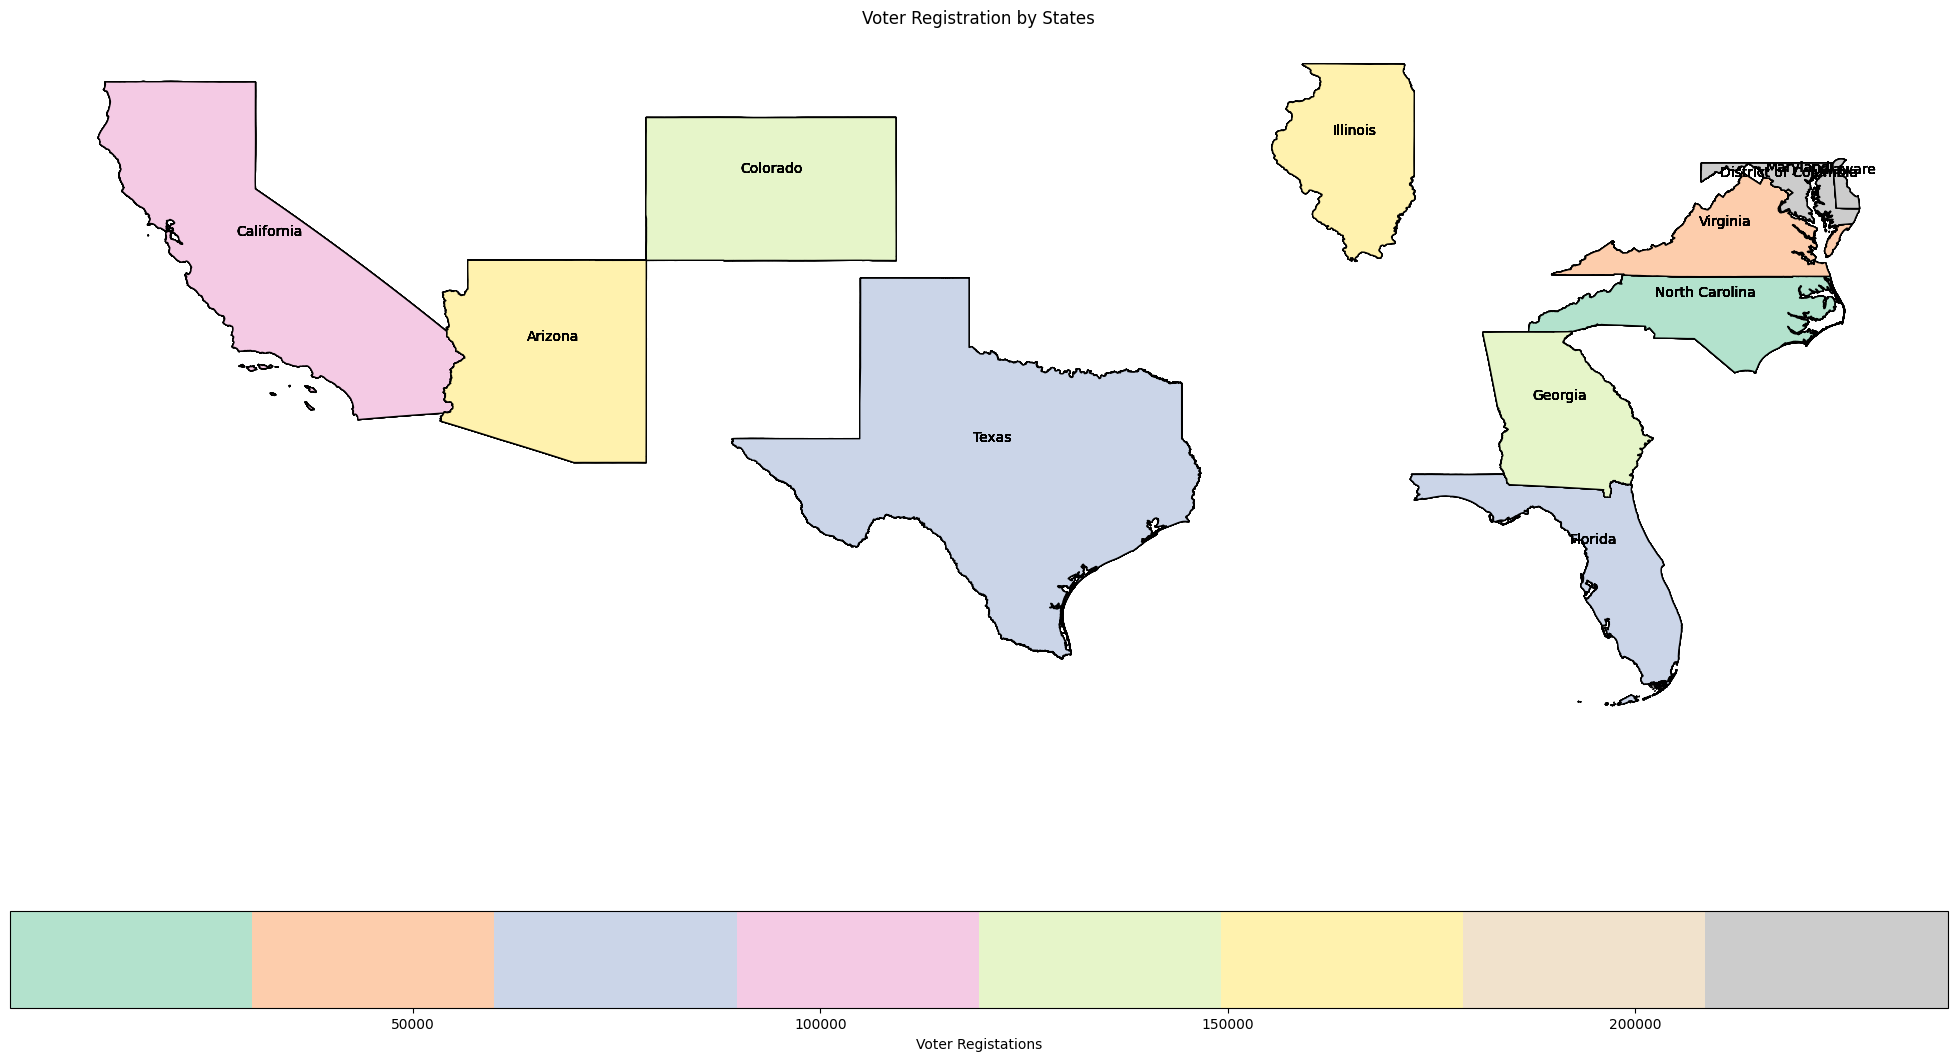

In [70]:
fig=plt.figure(figsize=(25,15))
ax= fig.add_subplot()
states_us.plot(column="registered_voters_x", ax=ax, legend=True, cmap="Pastel2", linewidth=.25,
      legend_kwds= {"label":"Voter Registations", "orientation":"horizontal"})
states_us.apply(lambda x: ax.annotate(
    text=x.NAME +"\n",
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=10), axis=1)
states_us.plot(ax=ax, edgecolor="black", cmap= "Pastel2")
plt.title('Voter Registration by States')
ax.set_axis_off()
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In [77]:
voter_ym= voters.groupby(['NAME','Month'])['registered_voters'].mean()
voter_ym.sort_values(ascending=False)

NAME                  Month
California            Mar      175544.0
                      Feb      170829.0
Texas                 Mar      150015.5
                      Feb      136937.5
                      Jan      133709.5
California            Jan      119584.5
                      Apr      112224.0
Florida               Feb       98605.0
Texas                 Apr       88946.5
Illinois              Feb       84064.5
North Carolina        Jan       73601.5
                      Feb       69205.0
Florida               Mar       64249.5
                      Jan       63848.5
Texas                 May       63441.5
North Carolina        Mar       56539.5
                      Apr       54412.5
Arizona               Feb       51004.0
Illinois              Mar       50340.5
                      Apr       48715.0
Georgia               Feb       48181.0
Illinois              Jan       44241.5
Arizona               Mar       40243.0
Virginia              Mar       37831.5
Florida               Apr       36769.5
Georgia               Jan       36762.5
                      Mar       35217.0
Virginia              Feb       33209.0
Maryland              Mar       32180.5
Arizona               Jan       29540.5
Colorado              Feb       27040.5
North Carolina        May       26445.5
Georgia               Apr       26256.0
Maryland              Feb       24915.0
Virginia              Jan       22983.0
Colorado              Mar       22308.5
Maryland              Jan       20556.0
Arizona               Apr       20458.5
Colorado              Jan       18642.0
Maryland              Apr       18358.0
Virginia              May       17239.0
Maryland              May       14658.0
Colorado              Apr       14119.0
Virginia              Apr       12963.5
Delaware              Mar        3829.5
District of Columbia  May        3819.5
Delaware              Feb        3491.0
District of Columbia  Mar        3465.5
                      Feb        3151.0
Delaware              Jan        3141.5
District of Columbia  Jan        3087.0
                      Apr        2719.0
Delaware              Apr        2203.5
Name: registered_voters, dtype: float64

We can see that there are a few states that have data for five month but the rest of the states only have data for four month. We can see that the states that have a large voter registration are the states that are more populare. We saw that California have the highest voter registration out of all the states that have been recorded. We can see that in March for California have the highest voter registration at 175544 compared to all the other states. But in the data that we were look at there were only 12 states that have the recorded voter registration. We do not have the full data to get the correct prediction on a national value nor can we confrim that California is the state that actually have the highest voter registration. But also the data we are comparing are from two different year we do not know any external factor of what people are doing to get more people to registered to vote. So if we were to contiune with the analyzation we should get the registered data for all the states. While getting  get all the registered voter count for the whole year with the way on how they are trying to get more people to registered to vote.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
from os import WUNTRACED
"Janey_wu"

'Janey_wu'